In [24]:
#CRIM - per capita crime rate by town 
#ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS - proportion of non-retail business acres per town.
#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#NOX - nitric oxides concentration (parts per 10 million)
#RM - average number of rooms per dwelling
#AGE - proportion of owner-occupied units built prior to 1940
#DIS - weighted distances to five Boston employment centres
#RAD - index of accessibility to radial highways
#TAX - full-value property-tax rate per $10,000
#PTRATIO - pupil-teacher ratio by town
#B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT - % lower status of the population
#MEDV - Median value of owner-occupied homes in $1000's

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

In [26]:
df = pd.read_csv('BostonHousing.csv')
df.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [27]:
#Let's make up a correlation matrix as there are too many factors to get estimated
corr_matrix = df.corr(method = 'pearson')
corr_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


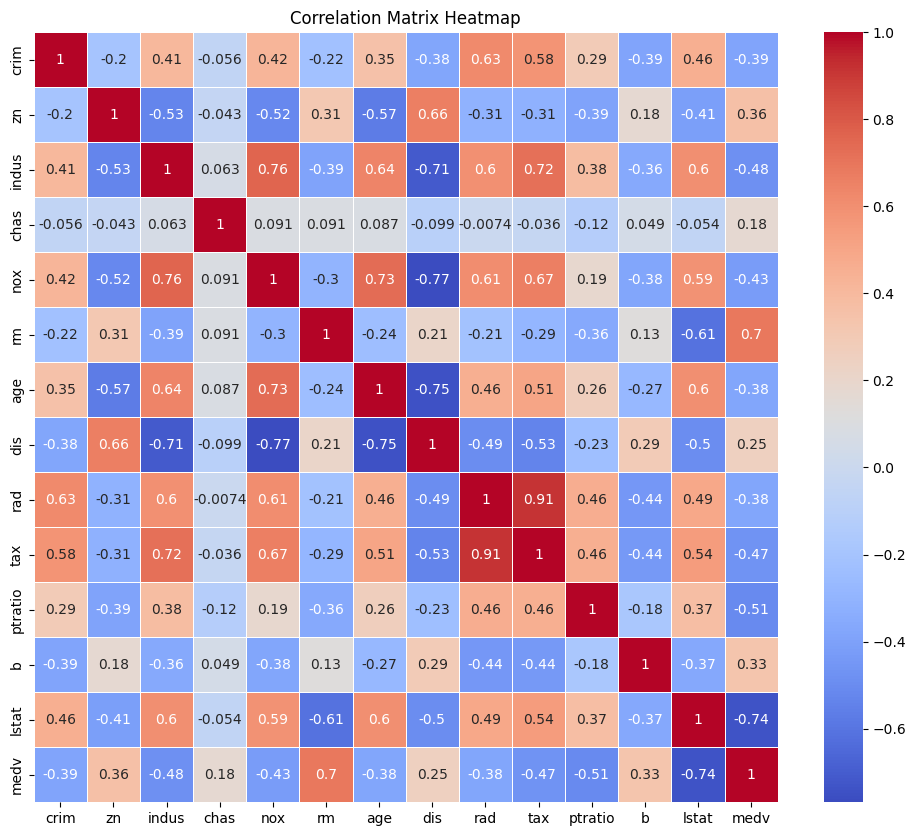

<Figure size 640x480 with 0 Axes>

In [93]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
plt.tight_layout()

In [28]:
#Conclusion:
#CRIM vs RAD, TAX
#ZN vs INDUS, NOX, AGE, DIS
#INDUS vs ZN, NOX, AGE, DIS, TAX, LSTAT
#NOX vs ZN, INDUS, AGE, DIS, RAD, TAX, LSTAT
#RM vs LSTAT, MEDV
#AGE vs ZN, INDUS, NOX, DIS, TAX, LSTAT
#DIS vs ZN, INDUS, NOX, AGE, TAX, LSTAT
#RAD vs CRIM, INDUS, NOX, TAX
#TAX vs CRIM, INDUS, NOX, AGE, DIS, RAD, LSTAT
#PTRATIO vs MEDV
#LSTAT vs INDUS, NOX, RM, AGE, DIS, TAX, MEDV
#MEDV vs RM, PTRATIO, LSTAT

In [29]:
#Let's check how the price would depend on the size of homes RM, teacher-students link (level of education) PTRATIO, and on the socio-economic status LSTAT 

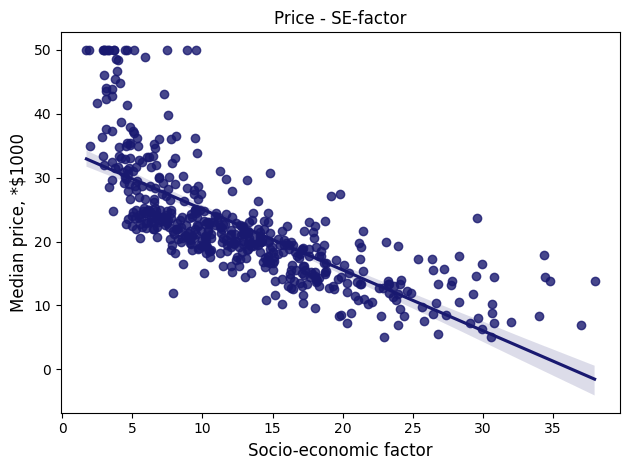

In [123]:
sns.regplot(data=df_MEDV, x='lstat', y='medv', color='#191970')
plt.xlabel('Socio-economic factor', size=12)
plt.ylabel('Median price, *$1000', size=12)
plt.title('Price - SE-factor', size=12)
plt.tight_layout()

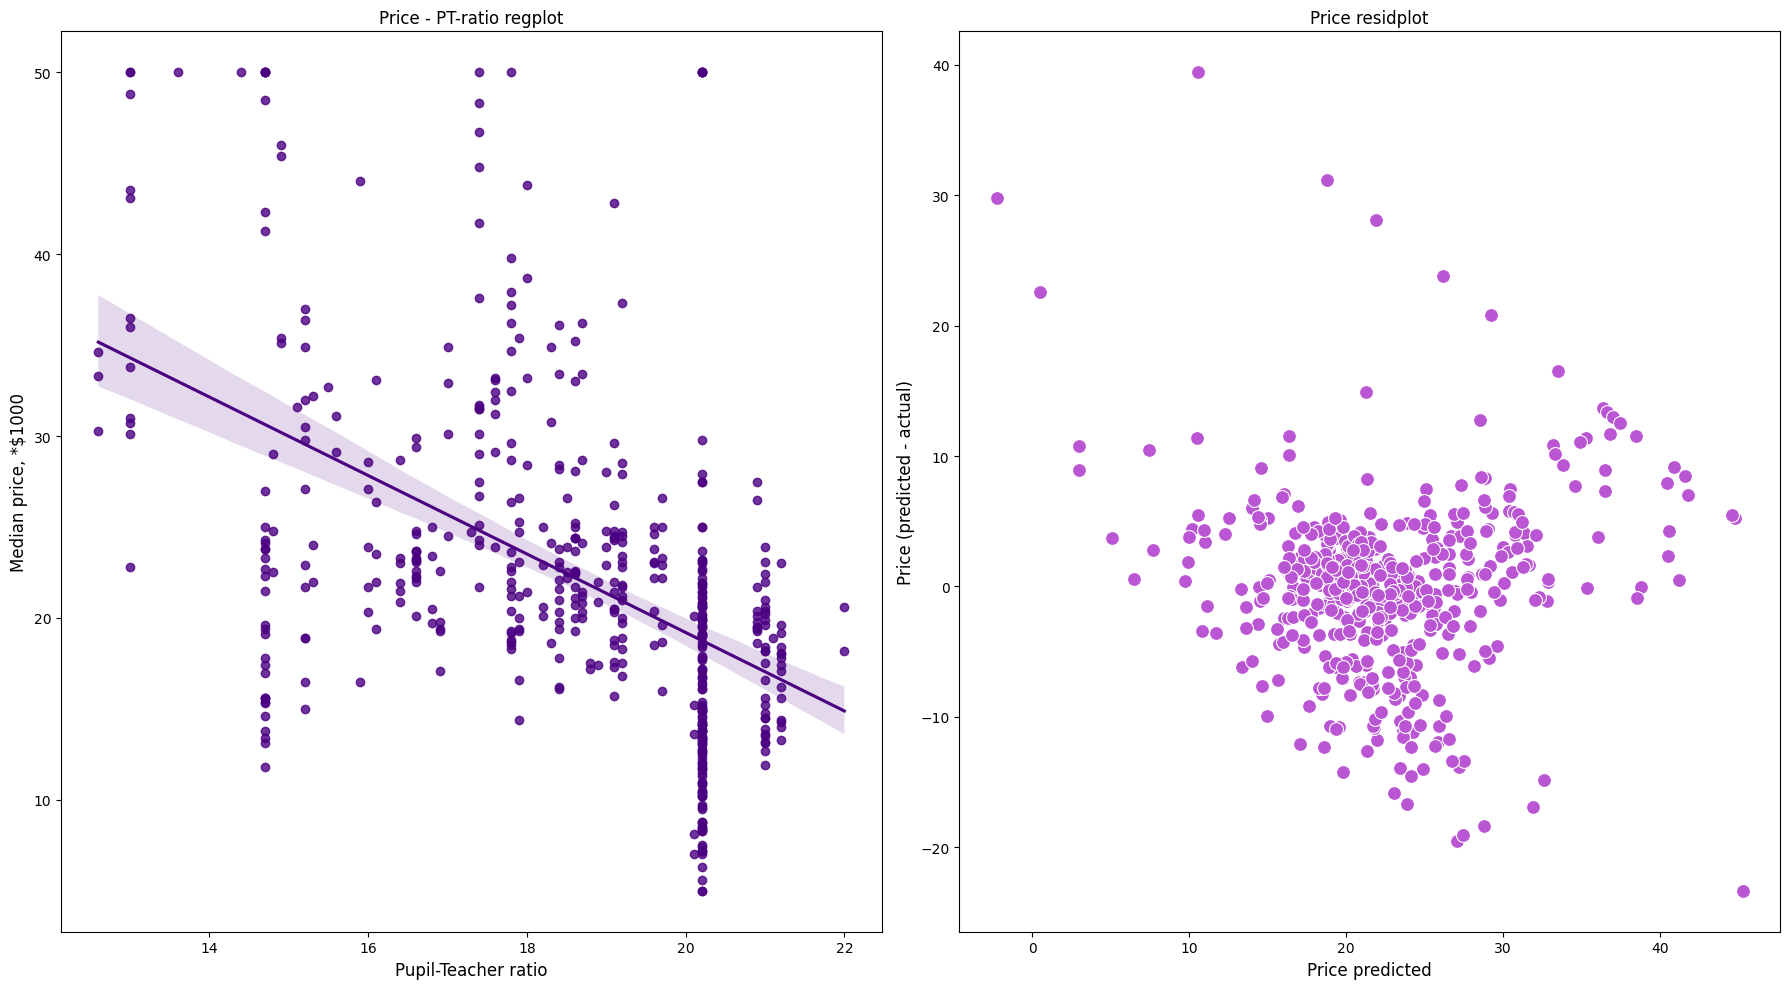

In [124]:
#It would be a good idea to draw a residual plot for the diagram in the middle
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['rm']]
Y = df['medv']
lm.fit(X, Y)
Yhat = lm.predict(X)
#print(lm.score(X, Y))
fig, axes = plt.subplots(1, 2, figsize=(18, 10)) 
sns.regplot(ax=axes[0], data=df_MEDV, x='ptratio', y='medv', color='#4B0082')
sns.scatterplot(ax=axes[1], x=Yhat, y=Y-Yhat, color='#BA55D3', s=100)
axes[0].set_title('Price - PT-ratio regplot', size=12)
axes[0].set_xlabel('Pupil-Teacher ratio', size=12) 
axes[0].set_ylabel('Median price, *$1000', size=12) 
axes[1].set_title('Price residplot', size=12)
axes[1].set_xlabel('Price predicted', size=12) 
axes[1].set_ylabel('Price (predicted - actual)', size=12) 
plt.tight_layout()

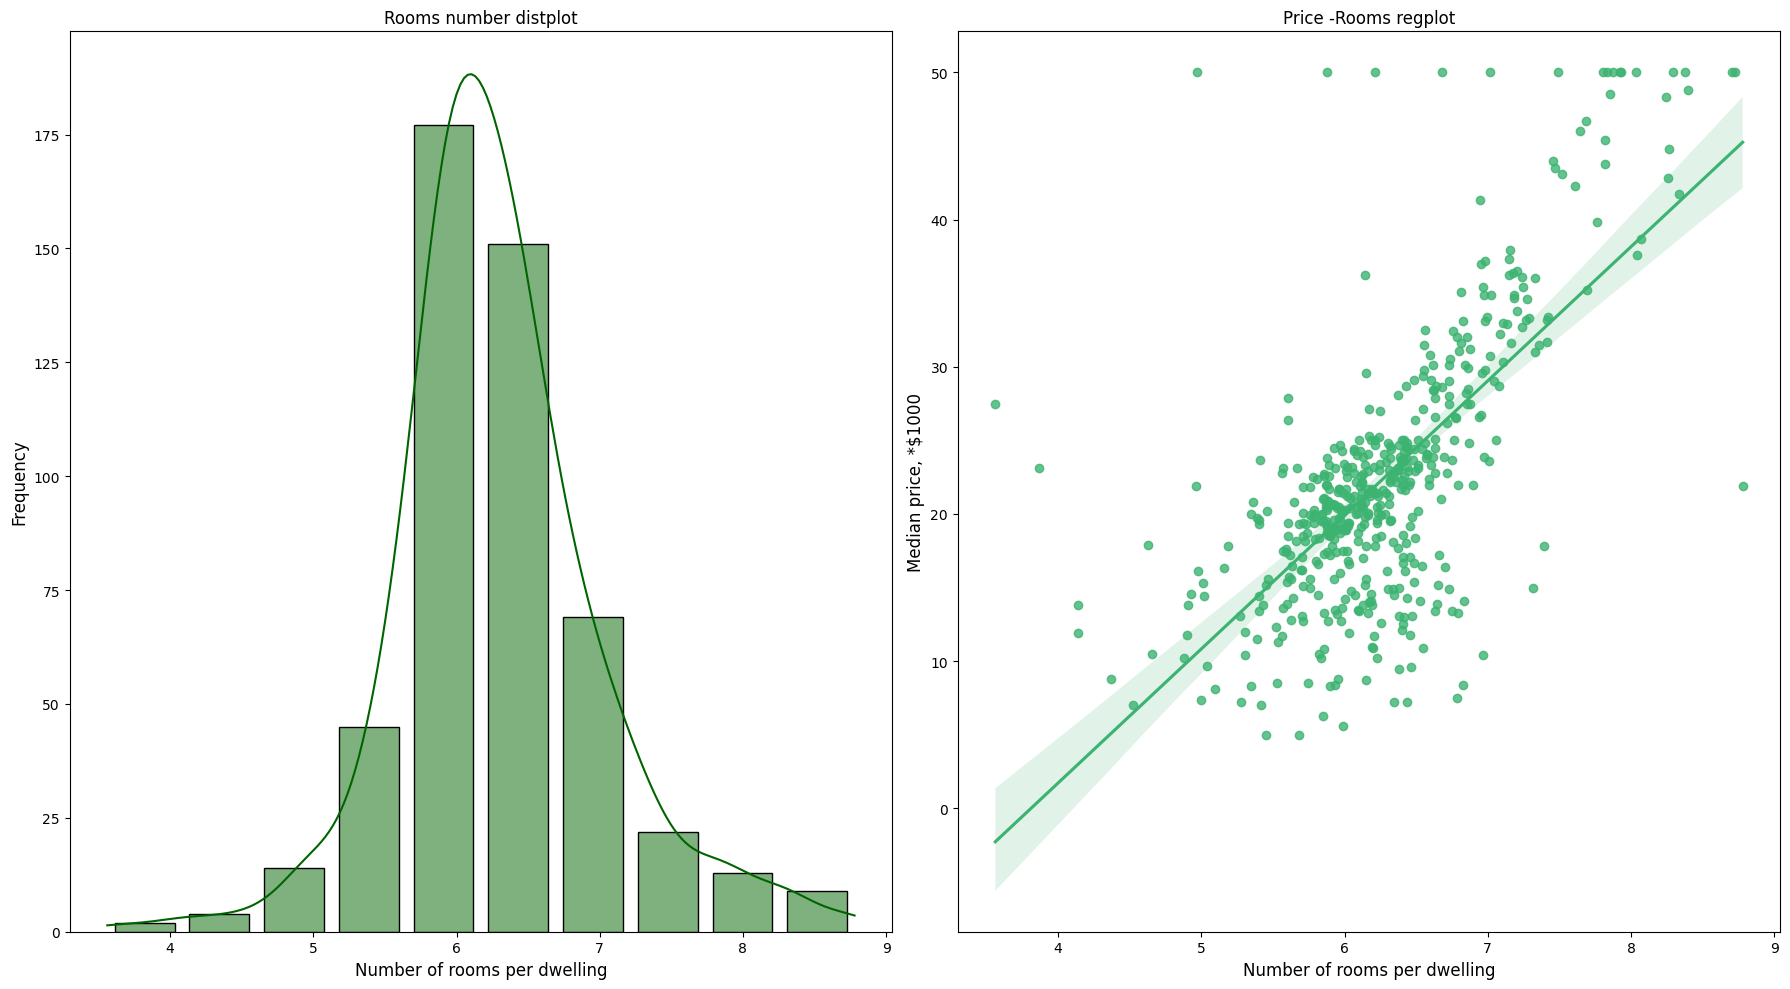

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10)) 
sns.histplot(ax=axes[0], data=df_MEDV['rm'], kde = True, color ='#006400', shrink=.8, bins=10)
sns.regplot(ax=axes[1], data=df_MEDV, x='rm', y='medv', color='#3CB371')
axes[0].set_title('Rooms number distplot', size=12)
axes[0].set_xlabel('Number of rooms per dwelling', size=12) 
axes[0].set_ylabel('Frequency', size=12) 
axes[1].set_title('Price - Rooms regplot', size=12)
axes[1].set_xlabel('Number of rooms per dwelling' , size=12) 
axes[1].set_ylabel('Median price, *$1000' , size=12) 
plt.tight_layout()

In [31]:
df_CHAS = df[['chas', 'crim', 'medv']]
df_CHAS.sort_values(by=['crim'])

,chas,crim,medv
0,0,0.00632,24.0
284,0,0.00906,32.2
285,0,0.01096,22.0
341,0,0.01301,32.7
55,0,0.01311,35.4
...,...,...,...
414,0,45.74610,7.0
410,0,51.13580,15.0
405,0,67.92080,5.0
418,0,73.53410,8.8


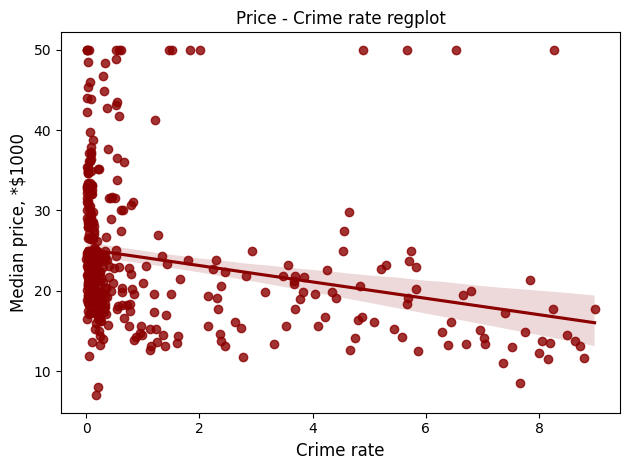

In [159]:
#We may assume the column to be extremely dubious. The option is to avoid outliers. The simpliest method is with using quartiles limitations
#1 method - std() and mean()-methods
#2 method - z-score & scipy stats
#3 method - quartiles through the boxplot
#4 method - sklearn.covariance - EllipticEnvelope 
Q1 = df['crim'].quantile(0.25)
Q3 = df['crim'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[(df['crim'] >= Q1 - 1.5 * IQR) & (df['crim'] <= Q3 + 1.5 * IQR)][['crim','medv', 'b', 'ptratio']]
#df_clean.sort_values(by=['crim'])
sns.regplot(data=df_clean, x='crim', y='medv', color='#8B0000')
plt.xlabel('Crime rate', size=12)
plt.ylabel('Median price, *$1000', size=12)
plt.title('Price - Crime rate regplot', size=12)
plt.tight_layout()

In [34]:
#Let's check the impact of the river on prices
#T-test is good for deciding whether two groups differ from each other or not
#HYPOTHESIS: NO DIFFERENCE WHETHER HOUSES ARE ALONGSIDE THE RIVER OR NOT

In [35]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(df[df['chas'] == 0]['medv'], df[df['chas'] == 1]['medv'])
print(f'P-value: {p_value}')
if p_value < 0.005:
    print('The hypothesis is rejected')
else:
    print('The hypothesis is valid')

P-value: 7.390623170519905e-05
The hypothesis is rejected


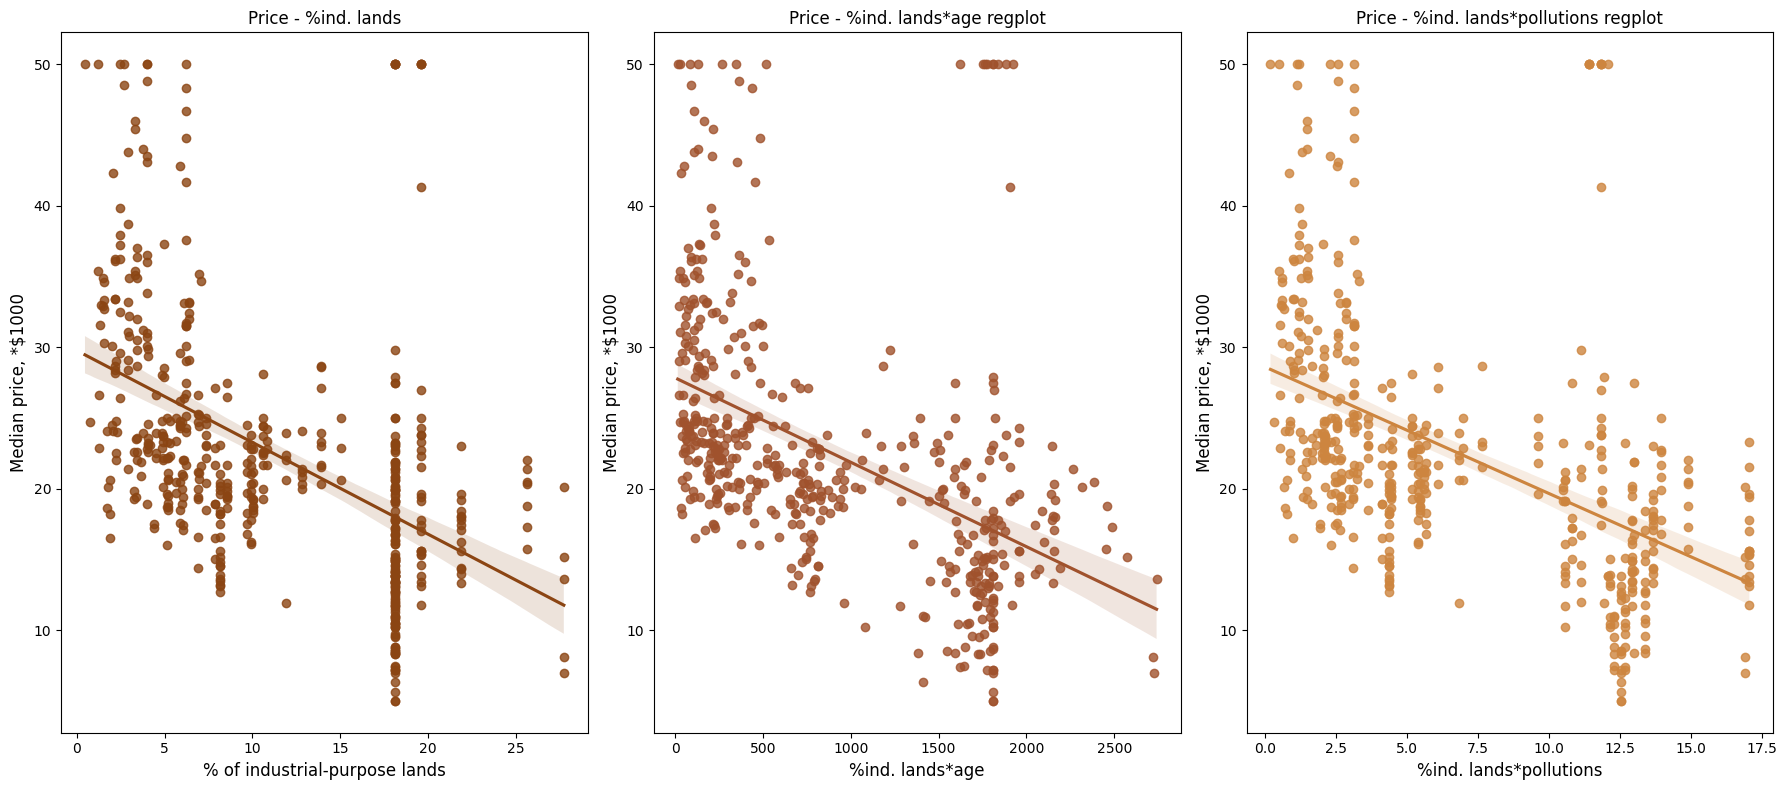

In [154]:
df['indus_age'] = df['indus'] * df['age']
df['indus_nox'] = df['indus'] * df['nox']
fig, axes = plt.subplots(1, 3, figsize=(18, 8)) 
sns.regplot(ax=axes[0], data=df, x='indus', y='medv', color='#8B4513')
sns.regplot(ax=axes[1], data=df, x='indus_age', y='medv', color='#A0522D')
sns.regplot(ax=axes[2], data=df, x='indus_nox', y='medv', color='#CD853F')
axes[0].set_title('Price - %ind. lands', size=12)
axes[0].set_xlabel('% of industrial-purpose lands', size=12) 
axes[0].set_ylabel('Median price, *$1000', size=12) 
axes[1].set_title('Price - %ind. lands*age regplot', size=12)
axes[1].set_xlabel('%ind. lands*age' , size=12) 
axes[1].set_ylabel('Median price, *$1000' , size=12)
axes[2].set_title('Price - %ind. lands*pollutions regplot', size=12)
axes[2].set_xlabel('%ind. lands*pollutions' , size=12) 
axes[2].set_ylabel('Median price, *$1000' , size=12)
plt.tight_layout()
#In areas with higher pollution, the impact of the proportion of ind.lands is quite mitigated
#In areas with older buildings,the impact of the proportion of ind.lands is stricter

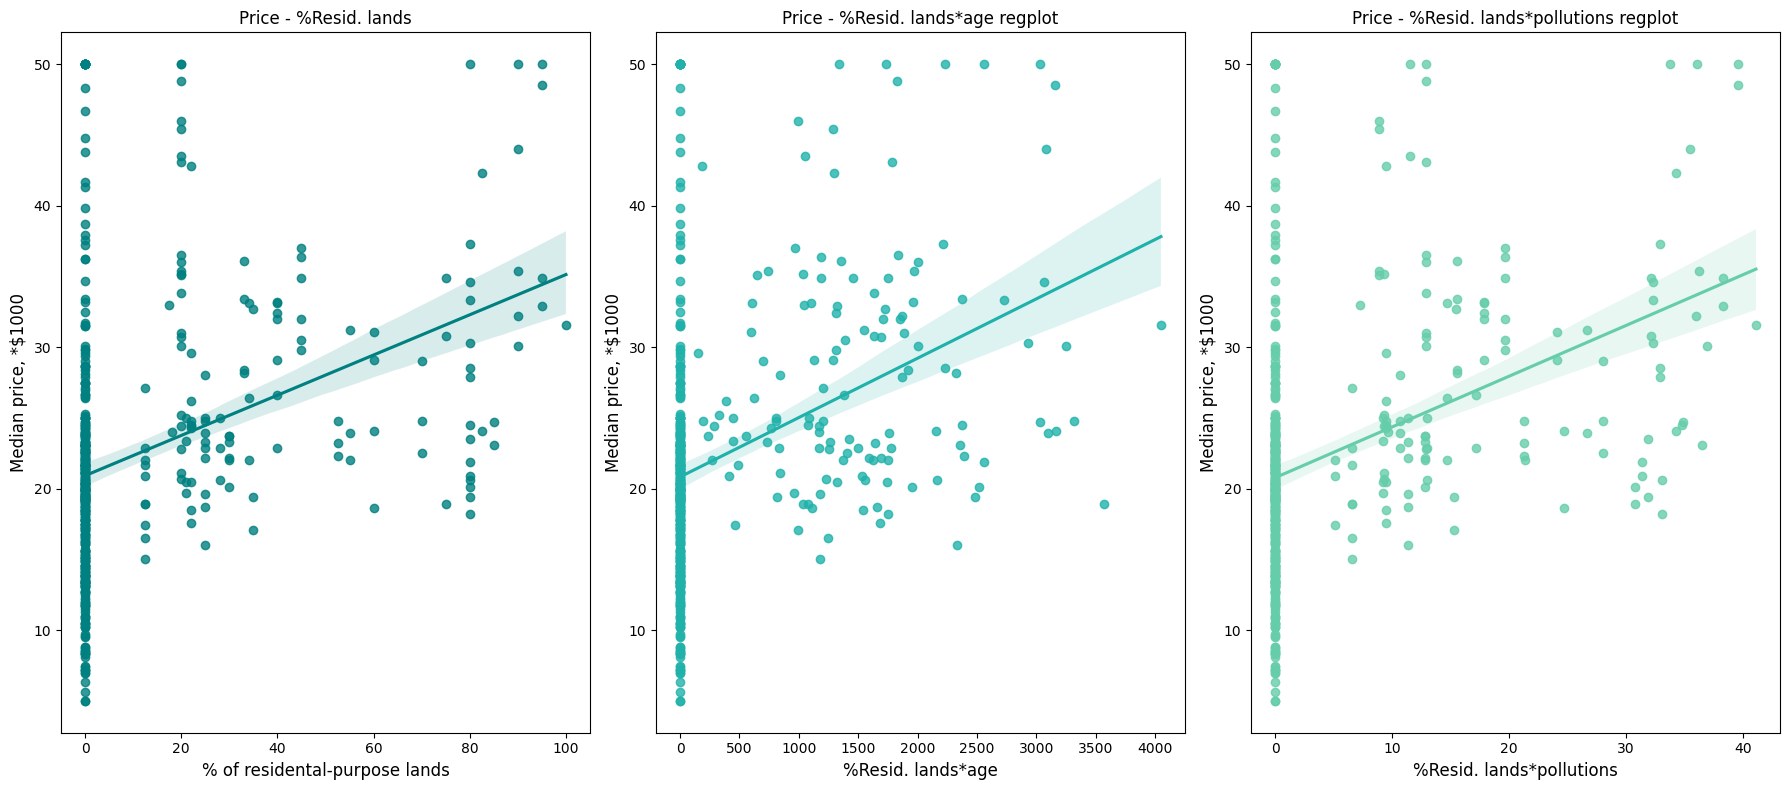

In [156]:
df['zn_age'] = df['zn'] * df['age']
df['zn_nox'] = df['zn'] * df['nox']
fig, axes = plt.subplots(1, 3, figsize=(18, 8)) 
sns.regplot(ax=axes[0], data=df, x='zn', y='medv', color='#008080')
sns.regplot(ax=axes[1], data=df, x='zn_age', y='medv', color='#20B2AA')
sns.regplot(ax=axes[2], data=df, x='zn_nox', y='medv', color='#66CDAA')
axes[0].set_title('Price - %Resid. lands', size=12)
axes[0].set_xlabel('% of residental-purpose lands', size=12) 
axes[0].set_ylabel('Median price, *$1000', size=12) 
axes[1].set_title('Price - %Resid. lands*age regplot', size=12)
axes[1].set_xlabel('%Resid. lands*age' , size=12) 
axes[1].set_ylabel('Median price, *$1000' , size=12)
axes[2].set_title('Price - %Resid. lands*pollutions regplot', size=12)
axes[2].set_xlabel('%Resid. lands*pollutions' , size=12) 
axes[2].set_ylabel('Median price, *$1000' , size=12)
plt.tight_layout()